In [1]:
import warnings
warnings.filterwarnings('ignore') #Ignoring the warning messages
import pandas as pd 
import seaborn as sns
from sklearn. model_selection import train_test_split, GridSearchCV 
from sklearn. linear_model import LogisticRegression 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from sklearn. metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report 
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
# Loading the Titanic Data
datafile = pd.read_csv("/Users/malhardhopate/Desktop/IUB/Fall 2023/Applied Machine Learning/HW2/Q2/Titanic - HW2.csv", sep=",",encoding="UTF-8")

# Loading the original datafile in a variable
df = datafile 

#showing first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1>Question 1 <br> Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require? </h1>

In [3]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 891
Number of Columns: 12


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Obtaining the Data Info
df.info()
print("*"*100)
# Checking for NAs
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
****************************************************************************************************


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Filling the NAs in Age column with the median age
df['Age'].fillna(df['Age'].median(), inplace = True)

# Filling the NAs in Embarked column with the first mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

# Removing not esential columns
df = df.drop(columns=['Name', 'Cabin', 'Ticket', 'PassengerId'])

df.info()
print("*"*100)
# Checking for NAs
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
****************************************************************************************************


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
# Converting 'Sex' & 'Embarked' to numerical category
df['Sex'].replace(['male', 'female'], [0,1], inplace = True)
df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)
print(df.head(5))
print("*"*100)
print(df.info())
print("*"*100)
print(df.isna().sum())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         0
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         0
3         1       1    1  35.0      1      0  53.1000         0
4         0       3    0  35.0      0      0   8.0500         0
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), i

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

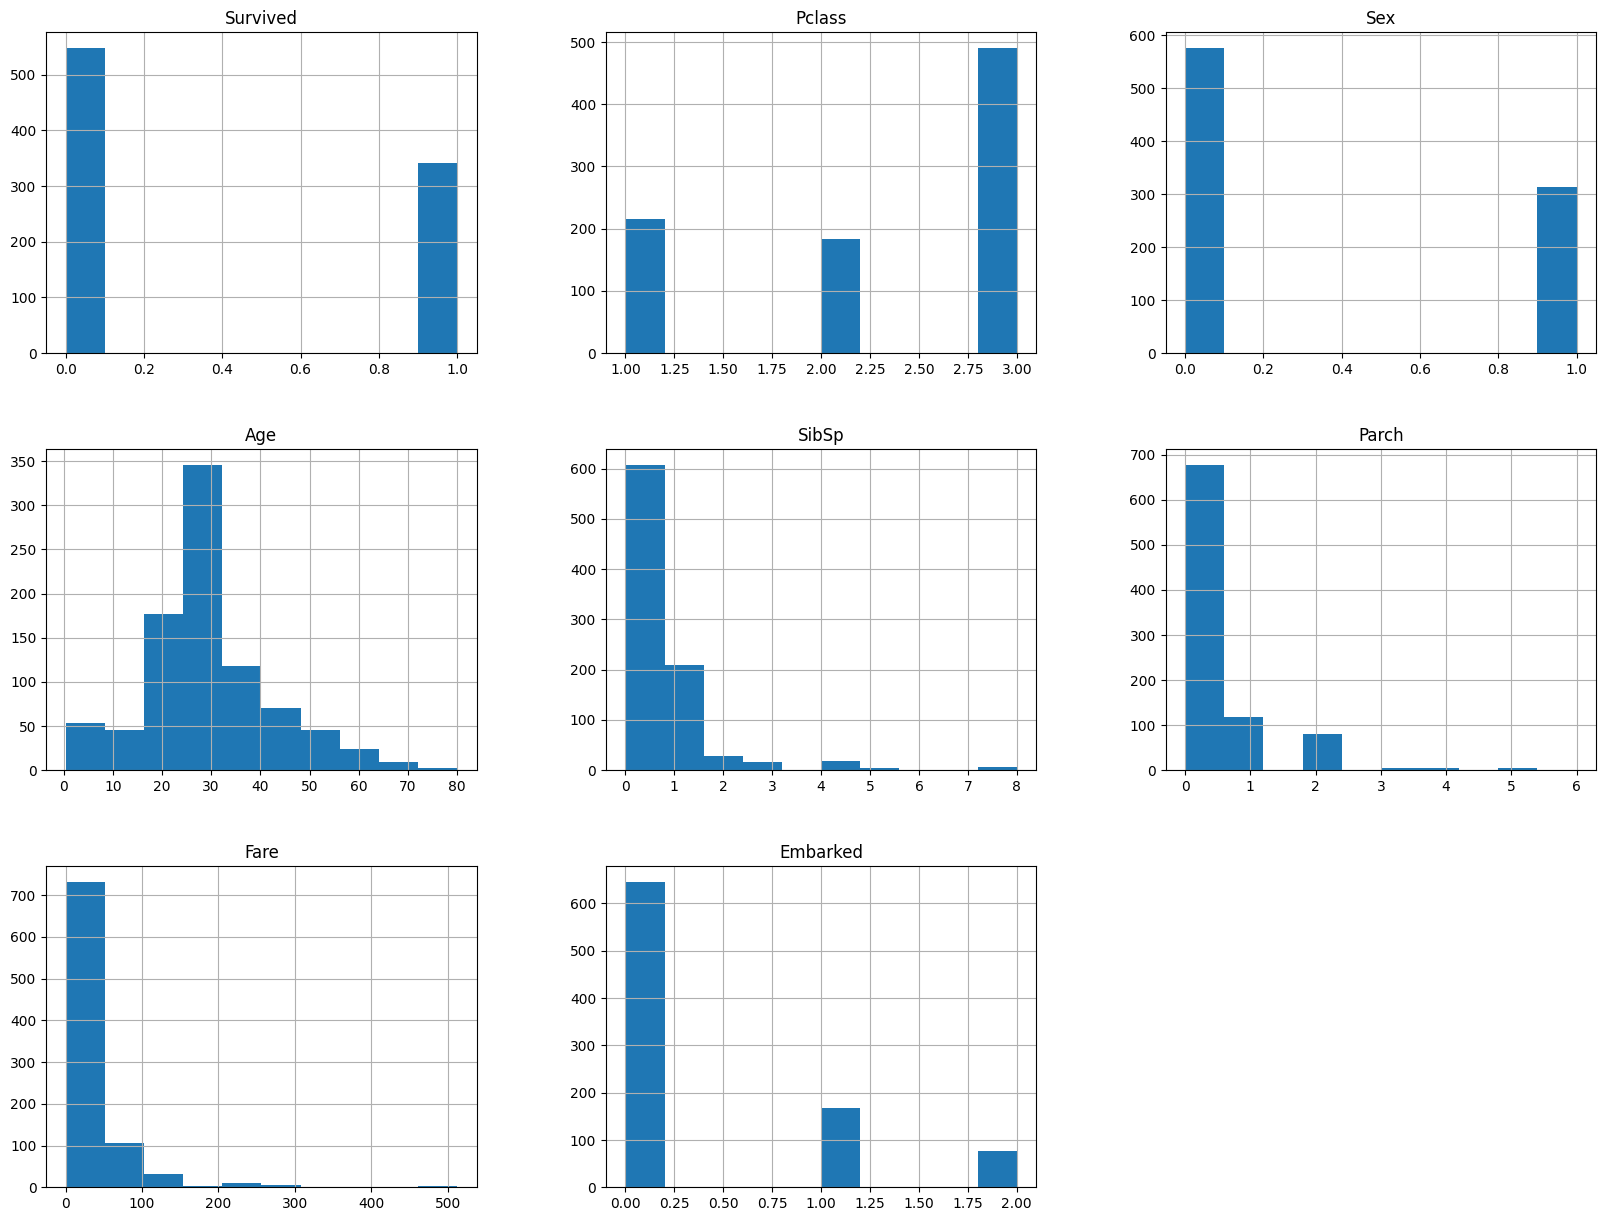

In [8]:
df.hist(grid=True,figsize=(20,15))

<H3>Answer 1</H3>
<H3>
    
1. There is special treatment required for 'Age' & 'Embarked' columns as this attributes had NA values for in them.
    - The NA values in 'Age' have been replaced by the median values for age
    - The NA values in 'Embarked' have been replaced by the mode values, as the mode will give the most frequent port of embarkment.
2. To determine whether or not a passenger survived, we do not need the cabin number, passenger name, or the ticket number, therefore the columns - 'Name', 'Cabin', 'Ticket' were removed.
3. 'Sex' & 'Embarked' columns have been converted to numerical format from a categorical format using the replace function. 
    
</H3>

<h1>Question 2 <br> Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. </h1>

In [9]:
df.corr(method="pearson")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


<Axes: >

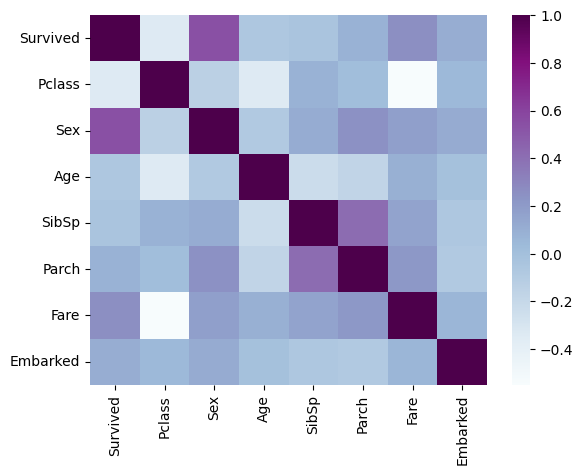

In [10]:
sns.heatmap(df.corr(method="pearson"), annot = False, cmap="BuPu")

In [11]:
# Finding the Correlation for every attribute with the label - 'rock category'
for column in df:
    print(column,": ", df[column].corr(df['Survived']))

Survived :  1.0
Pclass :  -0.3384810359610148
Sex :  0.5433513806577546
Age :  -0.06491041993052583
SibSp :  -0.03532249888573557
Parch :  0.08162940708348361
Fare :  0.2573065223849622
Embarked :  0.10681138570891942


In [12]:
# Finding attributes that are positively correlated
pos_cols = []
print("The negatively Correlated Attributes are - ")
for column in df:
    if df[column].corr(df['Survived']) > 0:
        print("\t", column,": ", df[column].corr(df['Survived']))
        pos_cols.append(column)

The negatively Correlated Attributes are - 
	 Survived :  1.0
	 Sex :  0.5433513806577546
	 Parch :  0.08162940708348361
	 Fare :  0.2573065223849622
	 Embarked :  0.10681138570891942


In [13]:
# Finding attributes that are negatively correlated
neg_cols = []
print("The negatively Correlated Attributes are - ")
for column in df:
    if df[column].corr(df['Survived']) < 0:
        print("\t", column,": ", df[column].corr(df['Survived']))
        neg_cols.append(column)

The negatively Correlated Attributes are - 
	 Pclass :  -0.3384810359610148
	 Age :  -0.06491041993052583
	 SibSp :  -0.03532249888573557


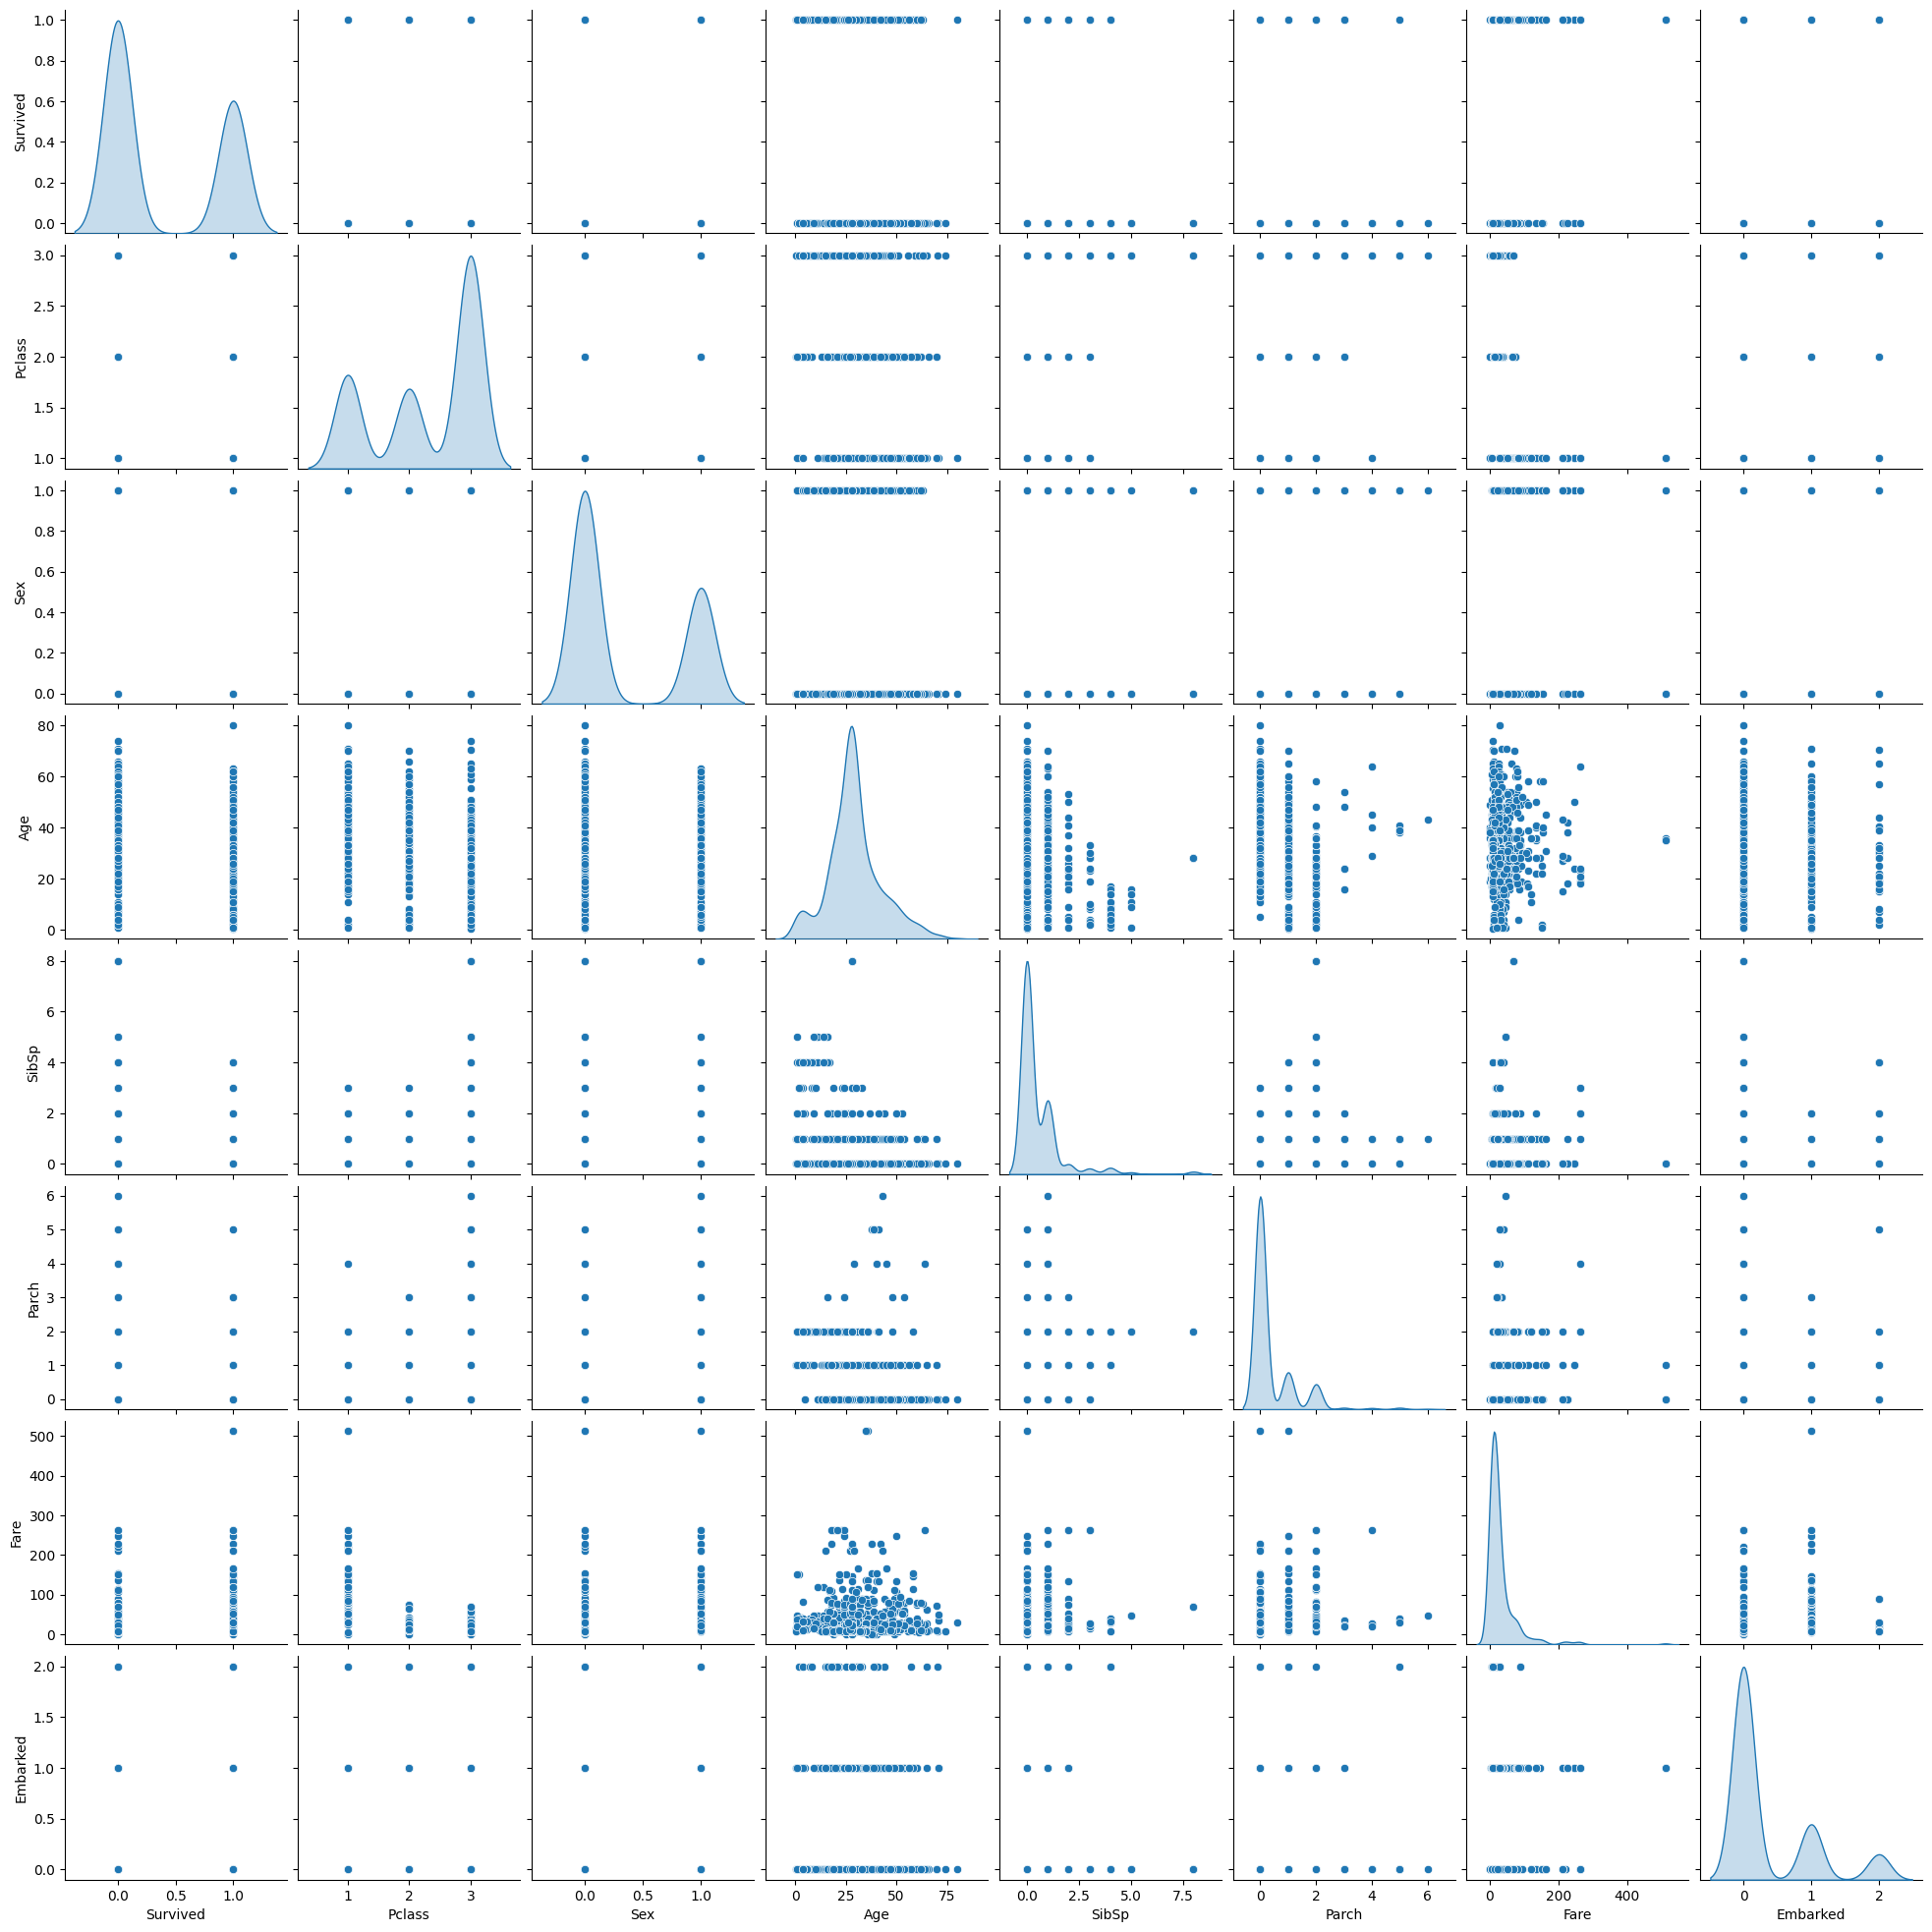

In [14]:
# Generating Scatter Plots
sns.pairplot(df, diag_kind="kde")

<H3>Answer 2 
    
* The columns 'PClass', 'Age', 'Sibsp' are negatively correlated to the label - 'Survived'. <br>
* The columsns 'Sex', 'Parch', 'Fare', 'Embarked' are positively correlated to the label - 'Survived'.</H3>

<h1>Question 3 <br>
Select 20% of the data for testing and 20% for validation and use the remaining 60% of the data for training. Describe how you did that and verify that your test and validation portions of the data are representative of the entire dataset. </h1>

In [15]:
# Splitting data into 60% training and 40% temp
X = df.drop(columns = ['Survived'])
y = df['Survived']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting data into test & validation based of the 40% Temp data
# Splitting data into 50% testing and 50% validation
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [17]:
print(f"The shape of Training Set is: ", X_train.shape)
print(f"The shape of Training Set label is: ", y_train.shape)
print("*"*100)
print(f"The shape of Validation Set is: ", X_validation.shape)
print(f"The shape of Validation Set label is: ", y_validation.shape)
print("*"*100)
print(f"The shape of Testing Set is: ", X_test.shape)
print(f"The shape of Testing Set label is: ", y_test.shape)
print("*"*100)

The shape of Training Set is:  (534, 7)
The shape of Training Set label is:  (534,)
****************************************************************************************************
The shape of Validation Set is:  (178, 7)
The shape of Validation Set label is:  (178,)
****************************************************************************************************
The shape of Testing Set is:  (179, 7)
The shape of Testing Set label is:  (179,)
****************************************************************************************************


array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Embarked'}>, <Axes: >, <Axes: >]],
      dtype=object)

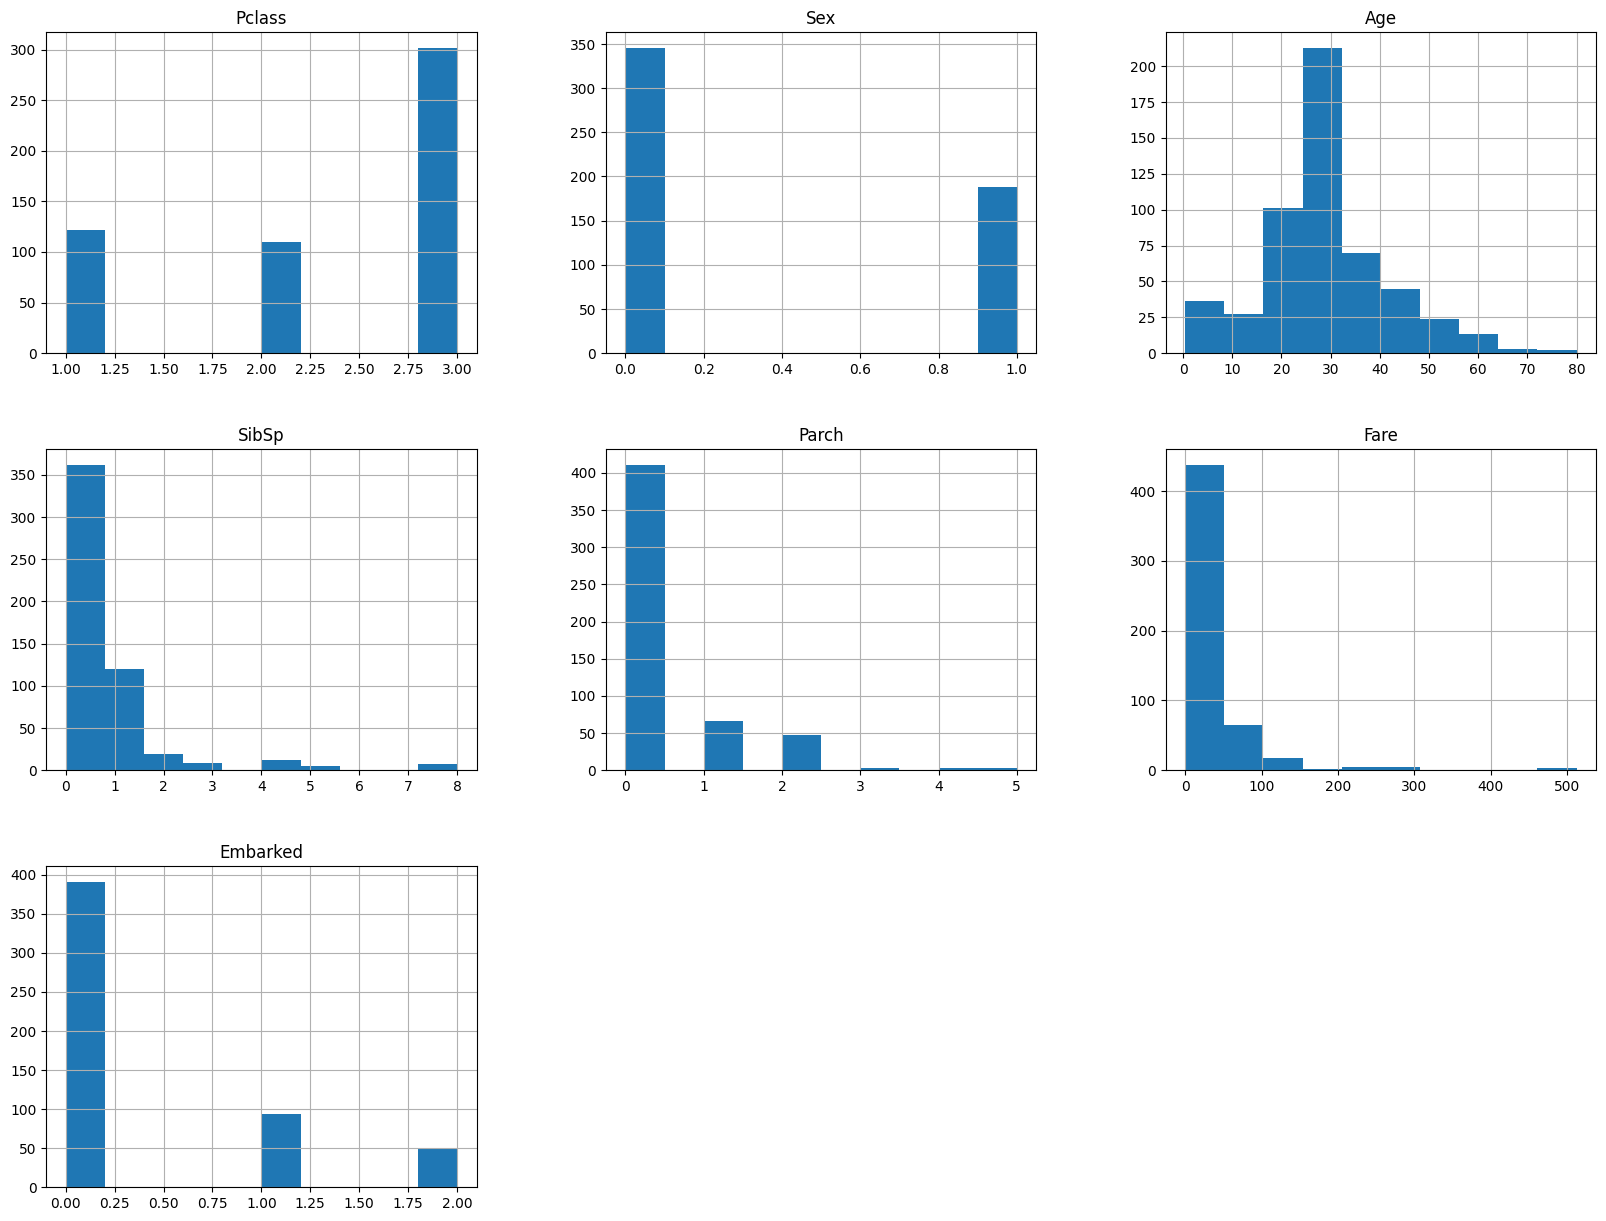

In [18]:
X_train.hist(grid=True,figsize=(20,15))

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Embarked'}>, <Axes: >, <Axes: >]],
      dtype=object)

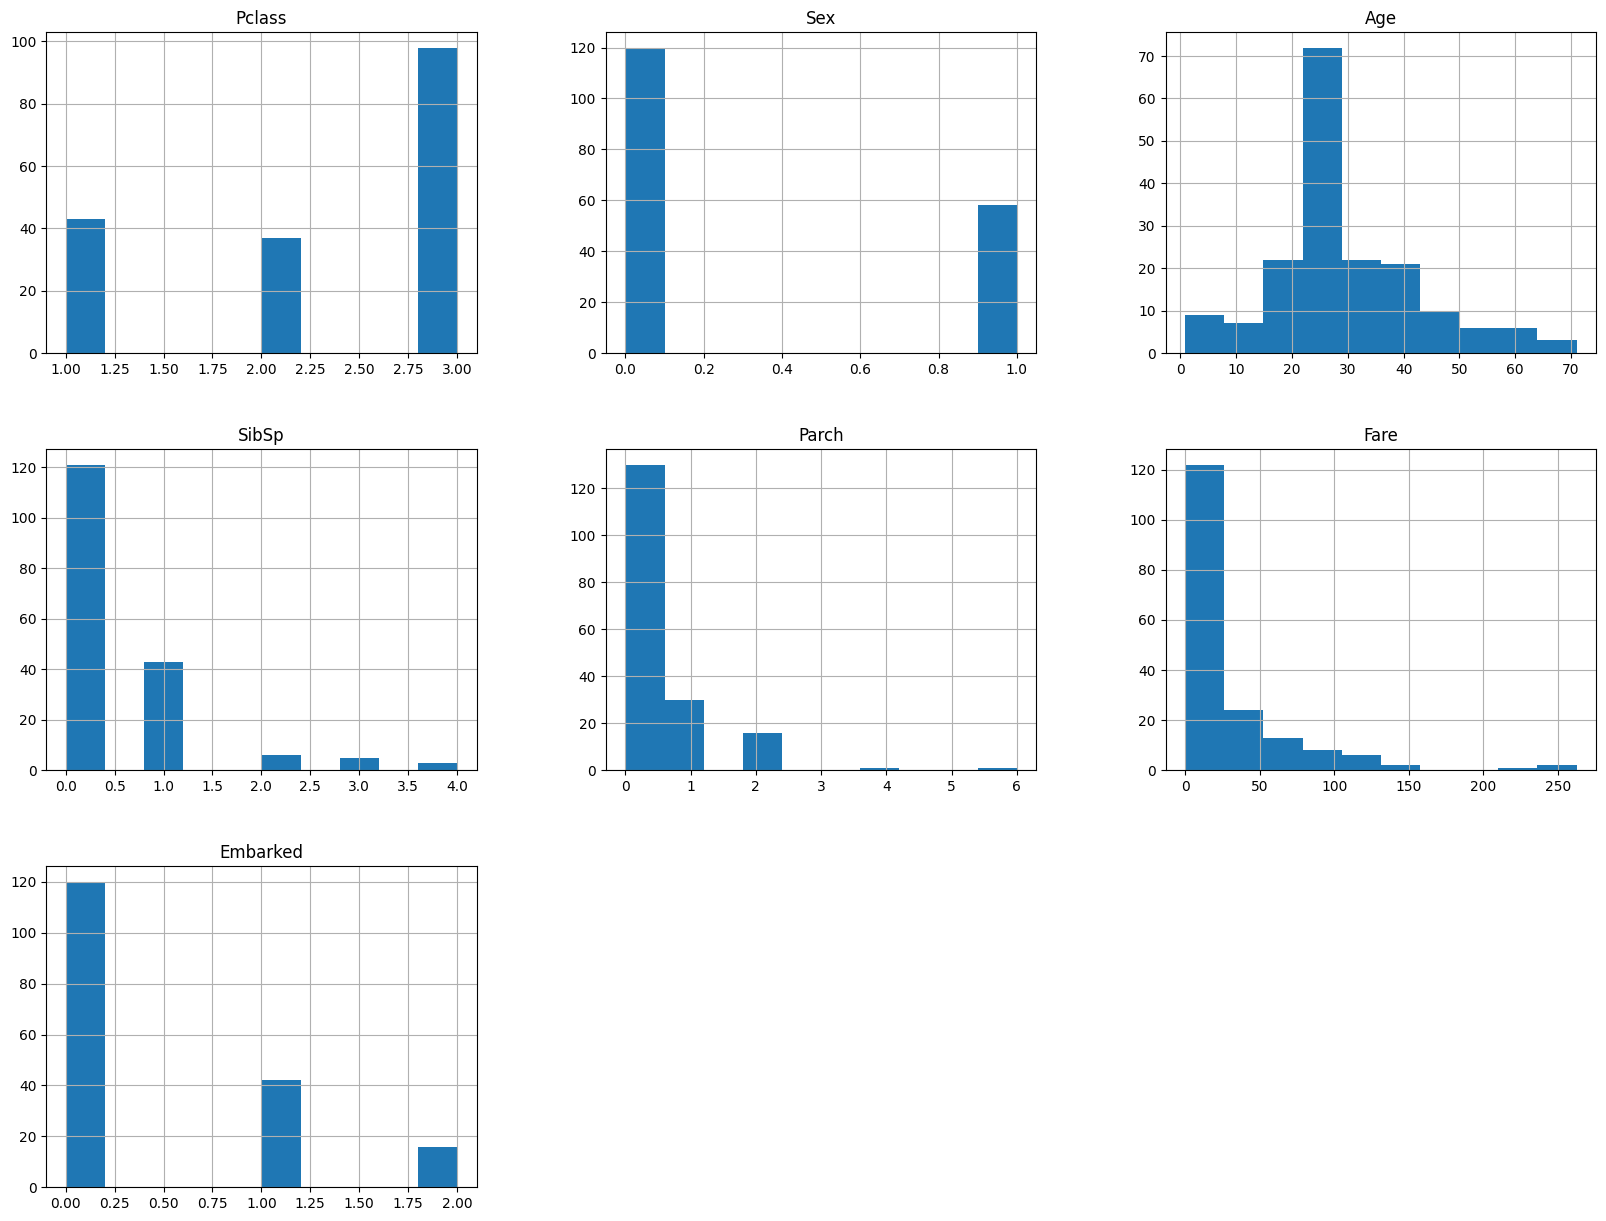

In [19]:
X_validation.hist(grid=True,figsize=(20,15))

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Embarked'}>, <Axes: >, <Axes: >]],
      dtype=object)

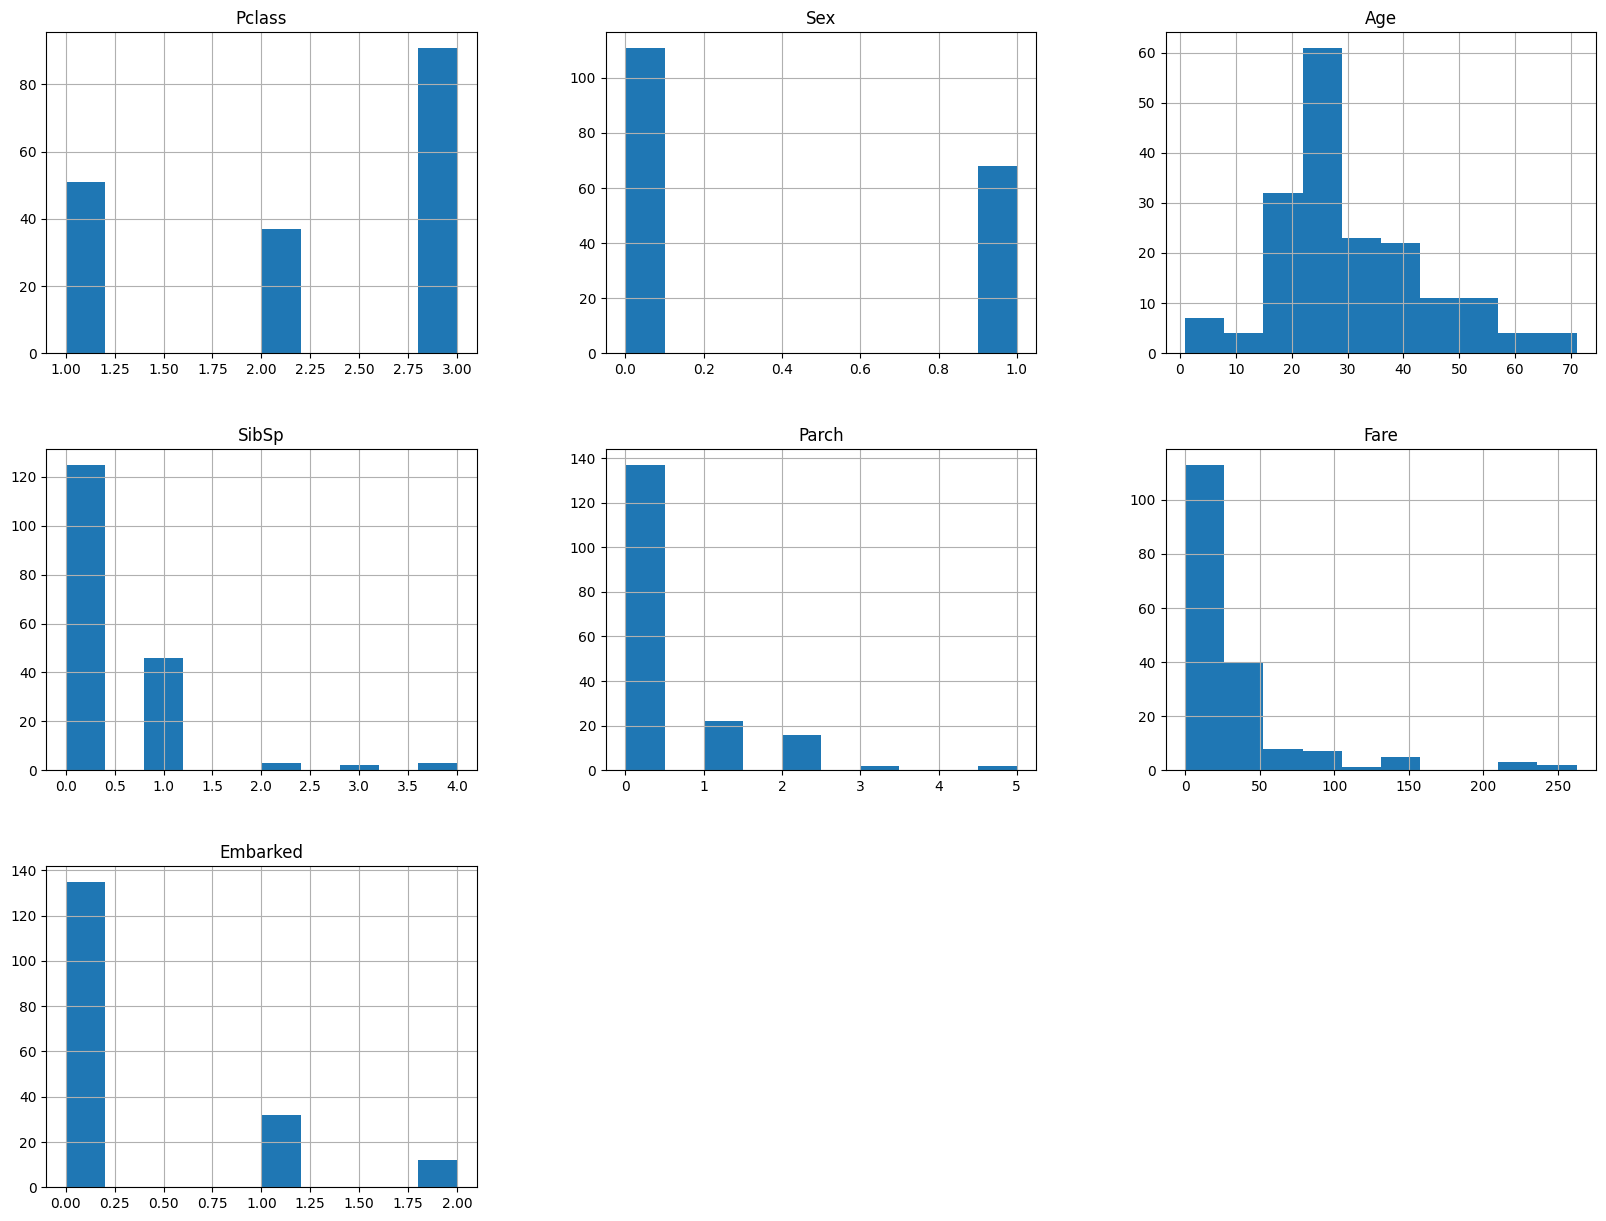

In [20]:
X_test.hist(grid=True,figsize=(20,15))

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Embarked'}>, <Axes: >, <Axes: >]],
      dtype=object)

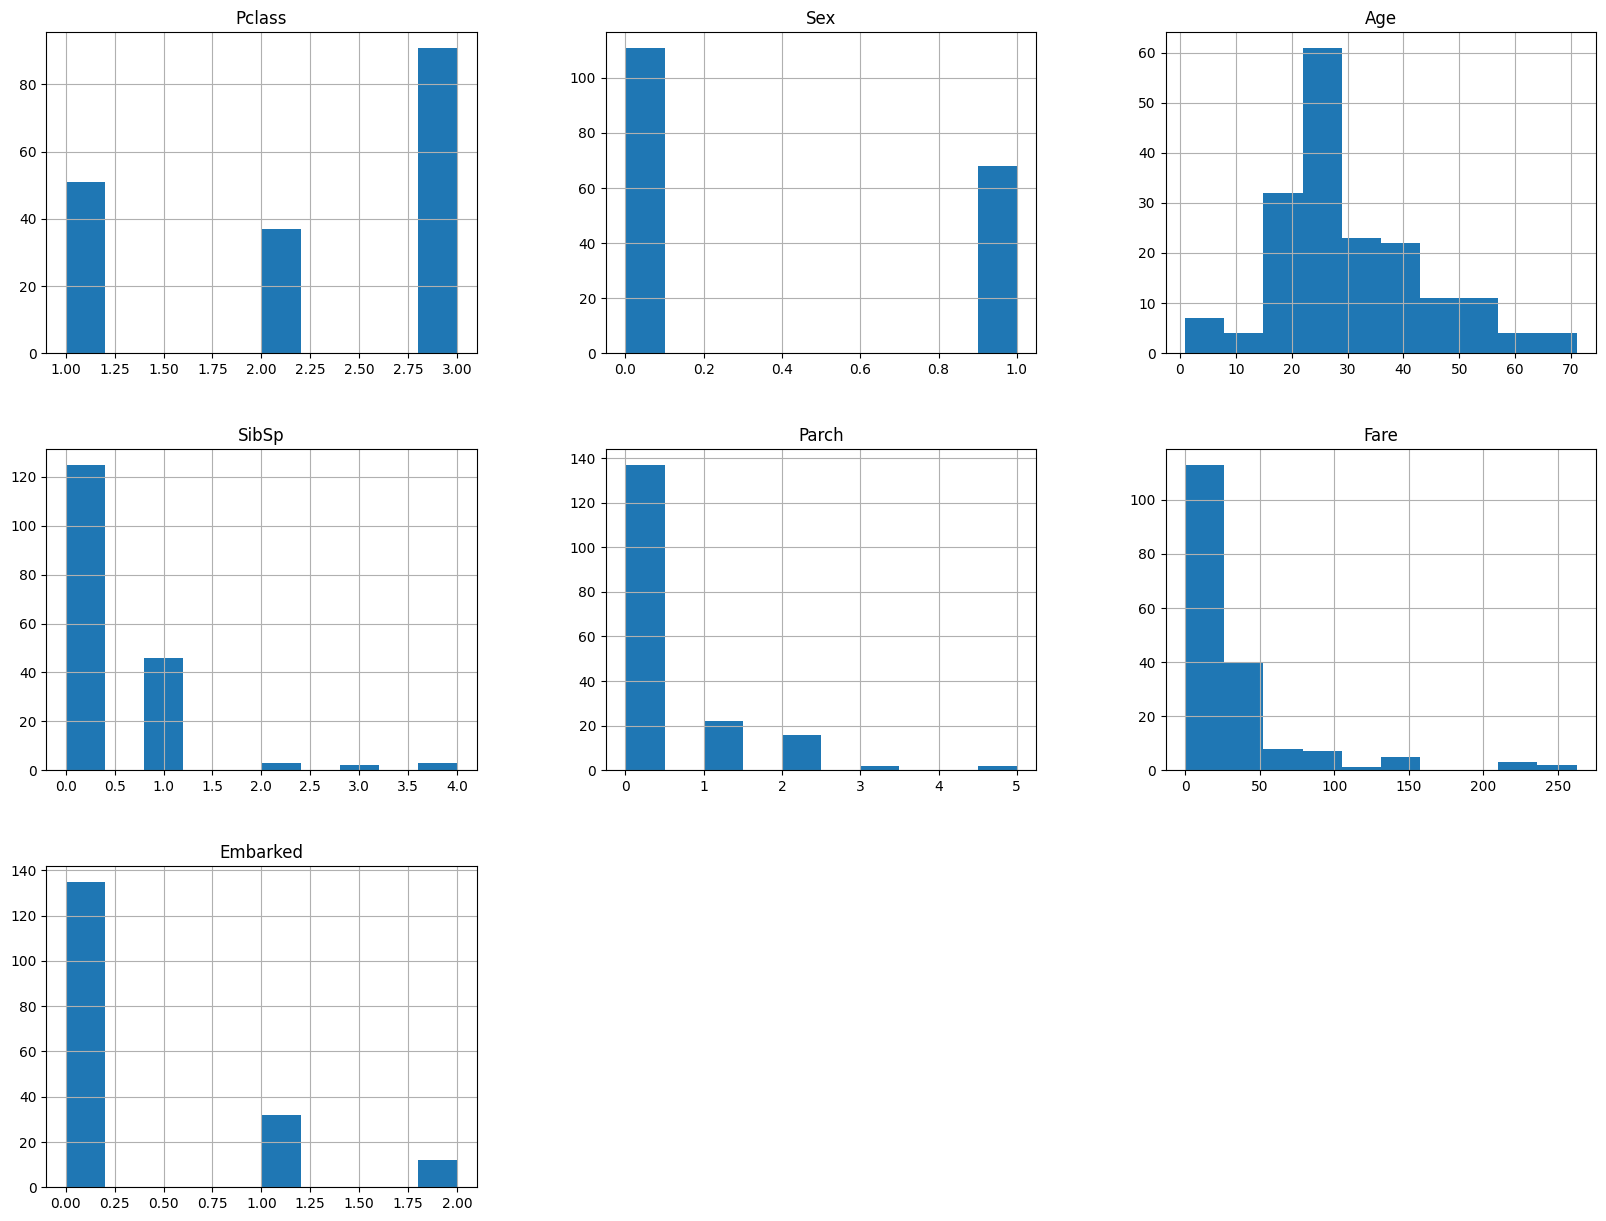

In [21]:
X_test.hist(grid=True,figsize=(20,15))

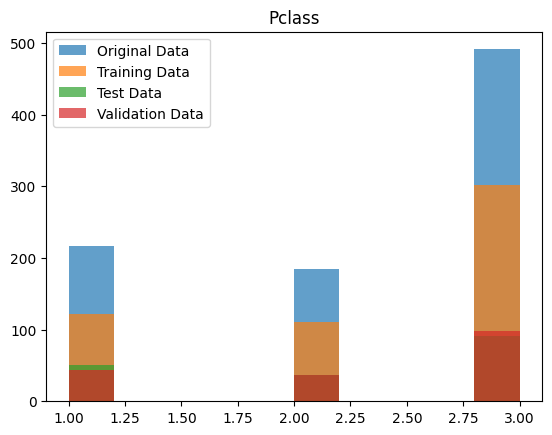

<Figure size 600x800 with 0 Axes>

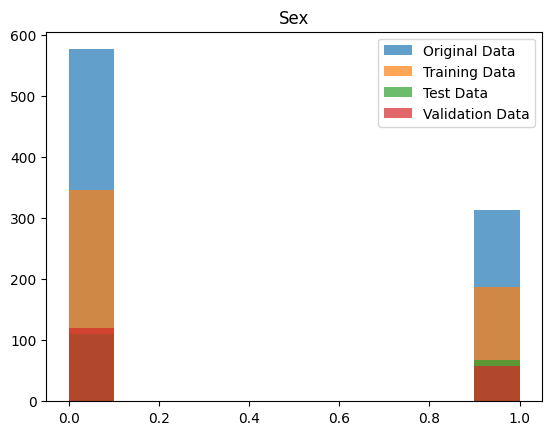

<Figure size 600x800 with 0 Axes>

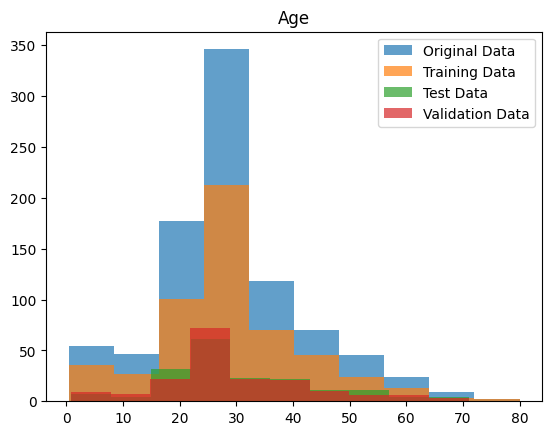

<Figure size 600x800 with 0 Axes>

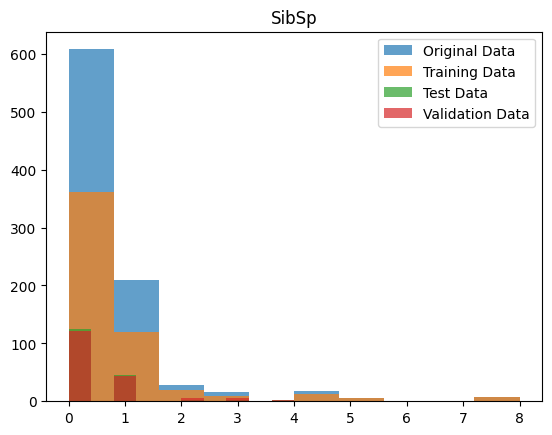

<Figure size 600x800 with 0 Axes>

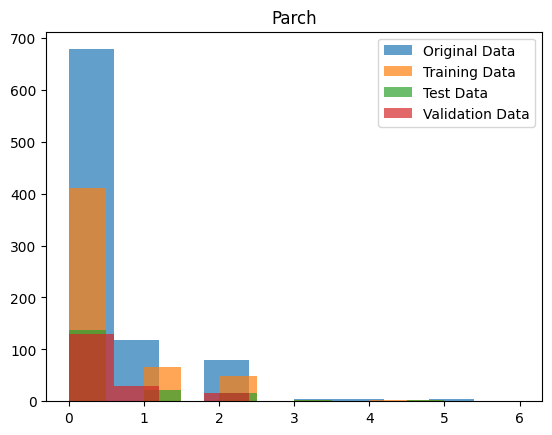

<Figure size 600x800 with 0 Axes>

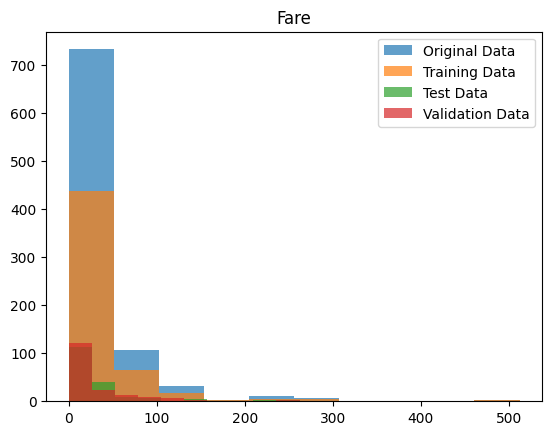

<Figure size 600x800 with 0 Axes>

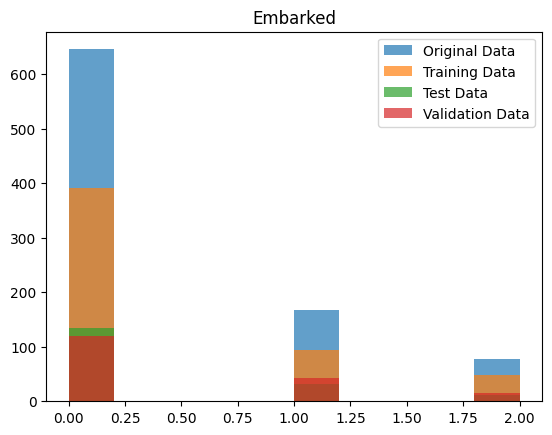

<Figure size 600x800 with 0 Axes>

In [22]:
# Plotting every Column for Original, Test, Train & Validation data
# in order to verify whether the datasets are representative of the entire dataset

for cols in X.columns:
    fig, ax = plt.subplots()
    ax.hist(X[cols], alpha = 0.7, label = "Original Data")
    ax.hist(X_train[cols], alpha = 0.7, label = "Training Data")
    ax.hist(X_test[cols], alpha = 0.7, label = "Test Data")
    ax.hist(X_validation[cols], alpha = 0.7, label = "Validation Data")
    ax.legend()
    plt.title(cols)
    plt.figure(figsize=(6,8))


<h3>Answer 3<br>
    
- The feature & lable data was divided into a 60%, 20% & 20% split for Trainig, Testing & Validating data respectively.
- We have plotted histograms for evey data set, to verify whether it represents the entire dataset.
- After plotting the datasets for each attribute in the train, test, validation & original dataset, we can verify that the training, testing & validation datasets are representative of the entire dataset. </h3>

<h1>Q.4 Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):</h1>
<h2>
    
1. Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations. <br>
2. Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.<br>        
3. Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.<br>
</h2>

<h1> Multimonial Logistic regression</h1>

In [23]:
# Multimonial Logistic regression
# Implementing Grid search to find the best parameter combination
# Define hyperparameter grid
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'C': [ 1.75, 2.0, 2.25, 2.50, 2.75, 3.0, 4.0, 5.0],  # Regularization parameter
    'solver': ['lbfgs', 'sag', 'saga', 'newton-cholesky'],  # Optimization algorithm
    'max_iter': [500, 600, 800, 1000],  # Maximum number of iterations
}

# Create the logistic regression classifier
logistic_regression = LogisticRegression(multi_class='multinomial', random_state=42)

# Looping different values of cv, to test the performace with the Validation data
for i in range(2,8):
    
    # Grid search to find the best hyperparameters
    grid_search = GridSearchCV(logistic_regression, param_grid, cv = i, scoring = 'accuracy', return_train_score = True)
    grid_search.fit(X_train, y_train.values.ravel())

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"For cv = ", i)
    print("The best parameter are: ", best_params)
    print("The accuracy score for the above parameters: ", grid_search.best_score_)

    # Train the model with the best hyperparameters
    best_logistic_regression = LogisticRegression(multi_class='multinomial', random_state=42, **best_params)
    best_logistic_regression.fit(X_train, y_train.values.ravel())
    
    # Validation set performance
    y_val_pred = best_logistic_regression.predict(X_validation)
    val_accuracy = accuracy_score(y_validation, y_val_pred)
    val_precision = precision_score(y_validation, y_val_pred, average='weighted')
    val_recall = recall_score(y_validation, y_val_pred, average='weighted')
    val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

    # Print performance metrics
    print("Validation Metrics:")
    print(f"\tAccuracy: {val_accuracy:.4f}")
    print(f"\tPrecision: {val_precision:.4f}")
    print(f"\tRecall: {val_recall:.4f}")
    print(f"\tF1 Score: {val_f1:.4f}")
    print("*"*100)

For cv =  2
The best parameter are:  {'C': 1.75, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
The accuracy score for the above parameters:  0.7958801498127341
Validation Metrics:
	Accuracy: 0.7697
	Precision: 0.7667
	Recall: 0.7697
	F1 Score: 0.7675
****************************************************************************************************
For cv =  3
The best parameter are:  {'C': 1.75, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
The accuracy score for the above parameters:  0.8108614232209738
Validation Metrics:
	Accuracy: 0.7697
	Precision: 0.7667
	Recall: 0.7697
	F1 Score: 0.7675
****************************************************************************************************
For cv =  4
The best parameter are:  {'C': 1.75, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
The accuracy score for the above parameters:  0.8033189316575019
Validation Metrics:
	Accuracy: 0.7697
	Precision: 0.7667
	Recall: 0.7697
	F1 Score: 0.7675
************************

<H3> 
    
- From the above it can be seen that the Accuracy score for the model is not really changing for different the CV scores, but the model accuracy is the higgest when cv = 4, and the parameters are
    - {'C': 1.75, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}.
- Therefore, using the above parameters as reference, the model is finalized by tuning the hyper parameters below -
</H3>


In [24]:
# Finalizing the Multinomial Logistic Regression classifier
# Train the model with the best hyperparameters
final_logistic_regression = LogisticRegression(multi_class='multinomial', C = 6, penalty = 'l2', max_iter = 1000, solver = 'lbfgs', 
                                              random_state=42)
final_logistic_regression.fit(X_train, y_train.values.ravel())

# Training Data Performance
y_train_pred = final_logistic_regression.predict(X_train)
val_accuracy = accuracy_score(y_train, y_train_pred)
val_precision = precision_score(y_train, y_train_pred, average='weighted')
val_recall = recall_score(y_train, y_train_pred, average='weighted')
val_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Print Training performance metrics
print("Validation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")

# Validation set performance
y_val_pred = final_logistic_regression.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("\nValidation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")

# Test set performance
y_test_pred = final_logistic_regression.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print performance metrics
print("\nTest Metrics:")
print(f"\tAccuracy: {test_accuracy:.4f}")
print(f"\tPrecision: {test_precision:.4f}")
print(f"\tRecall: {test_recall:.4f}")
print(f"\tF1 Score: {test_f1:.4f}")

Validation Metrics:
	Accuracy: 0.8034
	Precision: 0.8014
	Recall: 0.8034
	F1 Score: 0.8017

Validation Metrics:
	Accuracy: 0.7640
	Precision: 0.7615
	Recall: 0.7640
	F1 Score: 0.7624

Test Metrics:
	Accuracy: 0.8212
	Precision: 0.8236
	Recall: 0.8212
	F1 Score: 0.8185


<H4>
Compare to the Grid Search parameters -

1. The Accuracy of the model does not increase significantly for any change in the hyper parameters.
2. But the model gives a slightly better accuracy when C = 6
3. Therefore, the Multinomial Logistic Regression was finalized based on the following hyper parameters -
    - {'C': 6, 'max_iter': 1000, 'penalty' = 'l2', 'solver': 'lbfgs'}

</H4>

<h1>Support Vector Machines</h1>

In [25]:
from sklearn.svm import SVC

# Define hyperparameter grid & Running only 'rbf' kernal
param_grid = {
    'C': [1.0, 1.5, 1.75, 2.0, 3.0, 4.0, 4.5, 5.0],  # Regularization parameter
    'kernel': ['rbf'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of polynomial kernel (if applicable)
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 2, 3, 4],  # Kernel coefficient
}

# Create the SVM classifier
svm_classifier = SVC(random_state=42,probability=True)

# Running a for loop to find the best cv
for j in range(2,6):
    # Grid search to find the best hyperparameters
    grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv = j, scoring = 'accuracy')
    grid_search_svm.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_svm = grid_search_svm.best_params_
    print(f"For cv = ", j)
    print("The Best parameter combination is: ", best_params_svm)
    print("The accuracy score for the above parameters: ", grid_search_svm.best_score_)

    # Train the model with the best hyperparameters
    best_svm_classifier = SVC(random_state=42, **best_params_svm,probability=True)
    best_svm_classifier.fit(X_train, y_train.values.ravel())

    # Validation set performance
    y_val_pred = best_svm_classifier.predict(X_validation)
    val_accuracy = accuracy_score(y_validation, y_val_pred)
    val_precision = precision_score(y_validation, y_val_pred, average='weighted')
    val_recall = recall_score(y_validation, y_val_pred, average='weighted')
    val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

    # Print performance metrics
    print("Validation Metrics:")
    print(f"\tAccuracy: {val_accuracy:.4f}")
    print(f"\tPrecision: {val_precision:.4f}")
    print(f"\tRecall: {val_recall:.4f}")
    print(f"\tF1 Score: {val_f1:.4f}")
    print("*"*100)

For cv =  2
The Best parameter combination is:  {'C': 4.5, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
The accuracy score for the above parameters:  0.6872659176029963
Validation Metrics:
	Accuracy: 0.7416
	Precision: 0.7356
	Recall: 0.7416
	F1 Score: 0.7349
****************************************************************************************************
For cv =  3
The Best parameter combination is:  {'C': 5.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
The accuracy score for the above parameters:  0.6966292134831461
Validation Metrics:
	Accuracy: 0.7303
	Precision: 0.7233
	Recall: 0.7303
	F1 Score: 0.7219
****************************************************************************************************
For cv =  4
The Best parameter combination is:  {'C': 4.5, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
The accuracy score for the above parameters:  0.7059533161261363
Validation Metrics:
	Accuracy: 0.7416
	Precision: 0.7356
	Recall: 0.7416
	F1 Score: 0.7349
******************

<H3>For 'rbf' Kernel

- From the above simulation it can be seen that the Accuracy for the Validatioin Data doesn't really inmprove with the change in cv. But the best performing model produces an accuracy of 0.7266090636572033 when cv is 5.
- Therefore the above cv is the best for which the best hyperparameter combination is
   - {'C': 5.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
- The best Validation Accuracy produced by this model is - 0.7303
- Based on the parameters above the 'rbf' model could be finalized below -
</H3>

In [26]:
from sklearn.svm import SVC

# Finalizing the SVM classifier for 'rbf' kernel
svm_classifier_rbf = SVC(random_state=42, probability=True, C = 5, kernel = 'rbf', degree = 2, gamma = 0.001)
svm_classifier_rbf.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = svm_classifier_rbf.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")

# Test set performance
y_test_pred = svm_classifier_rbf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print performance metrics
print("\nTest Metrics:")
print(f"\tAccuracy: {test_accuracy:.4f}")
print(f"\tPrecision: {test_precision:.4f}")
print(f"\tRecall: {test_recall:.4f}")
print(f"\tF1 Score: {test_f1:.4f}")

Validation Metrics:
	Accuracy: 0.7528
	Precision: 0.7590
	Recall: 0.7528
	F1 Score: 0.7325

Test Metrics:
	Accuracy: 0.6872
	Precision: 0.7076
	Recall: 0.6872
	F1 Score: 0.6594


<H3>Compared to the Grid Search -

1. After changing the hyper parameters there is no significant increase in Accuracy after changing the C or degree.
2. The Model performs slightly better when the following parameters are used -
3. Therefore, the following hyperparameters are  optimum for SVM using 'rbf' kernel -
   - {'C': 5, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
</H3>

In [27]:
from sklearn.svm import SVC

# Define hyperparameter grid & Running only 'sigmoid' kernal
param_grid = {
    'C': [1.0, 1.5, 1.75, 2.0, 3.0, 4.0, 4.5, 5.0],  # Regularization parameter
    'kernel': ['sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of polynomial kernel (if applicable)
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 2, 3, 4],  # Kernel coefficient
}

# Create the SVM classifier
svm_classifier = SVC(random_state=42,probability=True)

# Running a for loop to find the best cv
for j in range(2,6):
    # Grid search to find the best hyperparameters
    grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv = j, scoring = 'accuracy')
    grid_search_svm.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params_svm = grid_search_svm.best_params_
    print(f"For cv = ", j)
    print("The Best parameter combination is: ", best_params_svm)
    print("The accuracy score for the above parameters: ", grid_search_svm.best_score_)

    # Train the model with the best hyperparameters
    best_svm_classifier = SVC(random_state=42, **best_params_svm,probability=True)
    best_svm_classifier.fit(X_train, y_train.values.ravel())

    # Validation set performance
    y_val_pred = best_svm_classifier.predict(X_validation)
    val_accuracy = accuracy_score(y_validation, y_val_pred)
    val_precision = precision_score(y_validation, y_val_pred, average='weighted')
    val_recall = recall_score(y_validation, y_val_pred, average='weighted')
    val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

    # Print performance metrics
    print("Validation Metrics:")
    print(f"\tAccuracy: {val_accuracy:.4f}")
    print(f"\tPrecision: {val_precision:.4f}")
    print(f"\tRecall: {val_recall:.4f}")
    print(f"\tF1 Score: {val_f1:.4f}")
    print("*"*100)

For cv =  2
The Best parameter combination is:  {'C': 1.5, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}
The accuracy score for the above parameters:  0.6367041198501873
Validation Metrics:
	Accuracy: 0.6517
	Precision: 0.7031
	Recall: 0.6517
	F1 Score: 0.5389
****************************************************************************************************
For cv =  3
The Best parameter combination is:  {'C': 1.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}
The accuracy score for the above parameters:  0.644194756554307
Validation Metrics:
	Accuracy: 0.6517
	Precision: 0.7031
	Recall: 0.6517
	F1 Score: 0.5389
****************************************************************************************************
For cv =  4
The Best parameter combination is:  {'C': 1.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}
The accuracy score for the above parameters:  0.636670968465941
Validation Metrics:
	Accuracy: 0.6517
	Precision: 0.7031
	Recall: 0.6517
	F1 Score: 0.5389
********

<H3>For 'sigmoid' Kernel

- From the above loop it can be seen that the Accuracy for the Validatioin Data doesn't really inmprove with the change in cv. But the best performing model produces an accuracy of 0.6310879915358842 when cv is 5.
- Therefore the above cv is the best for which the best hyperparameter combination is - {'C': 1.0, 'degree': 2, 'gamma': 0.001, 'kernel': 'sigmoid'}
- The best Validation Accuracy produced by this model is - 0.6292
- Based on the above hyper parameters the 'sigmoid' kernel could be finalized below -
</H3>

In [28]:
from sklearn.svm import SVC

# Finalizing the SVM classifier for 'rbf' kernel
svm_classifier_sig = SVC(random_state=42, probability=True, C = 3, kernel = 'sigmoid', degree = 5, gamma = 0.01)
svm_classifier_sig.fit(X_train, y_train.values.ravel())

# Validation set performance
y_val_pred = svm_classifier_sig.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("Validation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")

# Test set performance
y_test_pred = svm_classifier_rbf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print performance metrics
print("\nTest Metrics:")
print(f"\tAccuracy: {test_accuracy:.4f}")
print(f"\tPrecision: {test_precision:.4f}")
print(f"\tRecall: {test_recall:.4f}")
print(f"\tF1 Score: {test_f1:.4f}")

Validation Metrics:
	Accuracy: 0.6629
	Precision: 0.7288
	Recall: 0.6629
	F1 Score: 0.5616

Test Metrics:
	Accuracy: 0.6872
	Precision: 0.7076
	Recall: 0.6872
	F1 Score: 0.6594


<H3>Compared to the Grid Search -

1. After changing the hyper parameters there is no significant increase in Accuracy after changing the degree, or gamma.
2. The Model performs slightly better when C = 3.
3. Therefore, the following hyperparameters are the optimum for SVM using 'sigmoid' kernel -
   - {'C': 3, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
</H3>

In [29]:
# from sklearn.svm import SVC

# # Define hyperparameter grid & Running only 'linear' kernal
# param_grid = {
#     'C': [1.0, 1.5, 1.75, 2.0, 3.0, 4.0, 4.5, 5.0],  # Regularization parameter
#     'kernel': ['linear'],  # Kernel type
#     'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 2, 3, 4],  # Kernel coefficient
# }

# # Create the SVM classifier
# svm_classifier = SVC(random_state=42,probability=True)

# # Running a for loop to find the best cv
# for j in range(2,9):
#     # Grid search to find the best hyperparameters
#     grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv = j, scoring = 'accuracy')
#     grid_search_svm.fit(X_train, y_train)

#     # Get the best hyperparameters
#     best_params_svm = grid_search_svm.best_params_
#     print(f"For cv = ", j)
#     print("The Best parameter combination is: ", best_params_svm)
#     print("The accuracy score for the above parameters: ", grid_search_svm.best_score_)

#     # Train the model with the best hyperparameters
#     best_svm_classifier = SVC(random_state=42, **best_params_svm,probability=True)
#     best_svm_classifier.fit(X_train, y_train.values.ravel())

#     # Validation set performance
#     y_val_pred = best_svm_classifier.predict(X_validation)
#     val_accuracy = accuracy_score(y_validation, y_val_pred)
#     val_precision = precision_score(y_validation, y_val_pred, average='weighted')
#     val_recall = recall_score(y_validation, y_val_pred, average='weighted')
#     val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

#     # Print performance metrics
#     print("Validation Metrics:")
#     print(f"\tAccuracy: {val_accuracy:.4f}")
#     print(f"\tPrecision: {val_precision:.4f}")
#     print(f"\tRecall: {val_recall:.4f}")
#     print(f"\tF1 Score: {val_f1:.4f}")
#     print("*"*100)

<H3>The above grid search did not converge for the 'linear' kernel therefore, I ran and tuned each hyper parameter seperately in the following cells.</H3>

In [30]:
# Tuning 'linear' svm for C hyper parameter
from sklearn.svm import SVC
svm_c = [3, 4, 5, 6, 7, 8]
for c in svm_c:
    svm_classifier = SVC(random_state=42, C = c, kernel= 'linear', gamma = 1, probability=True)
    svm_classifier.fit(X_train, y_train)

    # Validation set performance
    y_val_pred = svm_classifier.predict(X_validation)
    val_accuracy = accuracy_score(y_validation, y_val_pred)
    val_precision = precision_score(y_validation, y_val_pred, average='weighted')
    val_recall = recall_score(y_validation, y_val_pred, average='weighted')
    val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

    # Print performance metrics
    print(f"For c = ", c)
    print("Validation Metrics:")
    print(f"\tAccuracy: {val_accuracy:.4f}")
    print(f"\tPrecision: {val_precision:.4f}")
    print(f"\tRecall: {val_recall:.4f}")
    print(f"\tF1 Score: {val_f1:.4f}")
    print("*"*100)

For c =  3
Validation Metrics:
	Accuracy: 0.7472
	Precision: 0.7428
	Recall: 0.7472
	F1 Score: 0.7438
****************************************************************************************************
For c =  4
Validation Metrics:
	Accuracy: 0.7472
	Precision: 0.7428
	Recall: 0.7472
	F1 Score: 0.7438
****************************************************************************************************
For c =  5
Validation Metrics:
	Accuracy: 0.7472
	Precision: 0.7428
	Recall: 0.7472
	F1 Score: 0.7438
****************************************************************************************************
For c =  6
Validation Metrics:
	Accuracy: 0.7472
	Precision: 0.7428
	Recall: 0.7472
	F1 Score: 0.7438
****************************************************************************************************
For c =  7
Validation Metrics:
	Accuracy: 0.7472
	Precision: 0.7428
	Recall: 0.7472
	F1 Score: 0.7438
**************************************************************************************

<H3>From the above code the best accuracy (0.7474) for the Validation Data is obtained when C = 4. Tuning Gamma below - </H3>

In [31]:
# Tuning 'linear' svm for gamma hyper parameter
from sklearn.svm import SVC
svm_g = [0.001, 0.01, 0.1, 1, 2, 3, 4]
for g in svm_g:
    svm_classifier = SVC(random_state=42, C = 4, kernel= 'linear', gamma = g, probability=True)
    svm_classifier.fit(X_train, y_train)

    # Validation set performance
    y_val_pred = svm_classifier.predict(X_validation)
    val_accuracy = accuracy_score(y_validation, y_val_pred)
    val_precision = precision_score(y_validation, y_val_pred, average='weighted')
    val_recall = recall_score(y_validation, y_val_pred, average='weighted')
    val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

    # Print performance metrics
    print(f"For Gamma = ", g)
    print("Validation Metrics:")
    print(f"\tAccuracy: {val_accuracy:.4f}")
    print(f"\tPrecision: {val_precision:.4f}")
    print(f"\tRecall: {val_recall:.4f}")
    print(f"\tF1 Score: {val_f1:.4f}")
    print("*"*100)

For Gamma =  0.001
Validation Metrics:
	Accuracy: 0.7472
	Precision: 0.7428
	Recall: 0.7472
	F1 Score: 0.7438
****************************************************************************************************
For Gamma =  0.01
Validation Metrics:
	Accuracy: 0.7472
	Precision: 0.7428
	Recall: 0.7472
	F1 Score: 0.7438
****************************************************************************************************
For Gamma =  0.1
Validation Metrics:
	Accuracy: 0.7472
	Precision: 0.7428
	Recall: 0.7472
	F1 Score: 0.7438
****************************************************************************************************
For Gamma =  1
Validation Metrics:
	Accuracy: 0.7472
	Precision: 0.7428
	Recall: 0.7472
	F1 Score: 0.7438
****************************************************************************************************
For Gamma =  2
Validation Metrics:
	Accuracy: 0.7472
	Precision: 0.7428
	Recall: 0.7472
	F1 Score: 0.7438
*********************************************************

<H3>

- From the above code the we can see that Accuracy for the Validation data does not change so gamma = 0.01 is used.
- Finalizing & Selecting the best 'linear' model below,
  - Out of the 3 kernels - 'rbf', 'sigmoid' & 'linear', the 'rbf' model is the best as it produces the highest Validation Data Accuracy. </H3>

In [32]:
# Finalizing 'linear' svm for gamma hyper parameter
from sklearn.svm import SVC

final_svm_classifier = SVC(random_state=42, probability=True, C = 5, kernel = 'rbf', degree = 2, gamma = 0.001)
final_svm_classifier.fit(X_train, y_train.values.ravel())

# Train Data Performance
y_train_pred = final_svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Print Training Performance metrics
print("Training Metrics:")
print(f"\tAccuracy: {train_accuracy:.4f}")
print(f"\tPrecision: {train_precision:.4f}")
print(f"\tRecall: {train_recall:.4f}")
print(f"\tF1 Score: {train_f1:.4f}")

# Validation set performance
y_val_pred = final_svm_classifier.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')

# Print performance metrics
print("\nValidation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")

# Test set performance
y_test_pred = final_svm_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print performance metrics
print("\nTest Metrics:")
print(f"\tAccuracy: {test_accuracy:.4f}")
print(f"\tPrecision: {test_precision:.4f}")
print(f"\tRecall: {test_recall:.4f}")
print(f"\tF1 Score: {test_f1:.4f}")

Training Metrics:
	Accuracy: 0.7247
	Precision: 0.7282
	Recall: 0.7247
	F1 Score: 0.7018

Validation Metrics:
	Accuracy: 0.7528
	Precision: 0.7590
	Recall: 0.7528
	F1 Score: 0.7325

Test Metrics:
	Accuracy: 0.6872
	Precision: 0.7076
	Recall: 0.6872
	F1 Score: 0.6594


<H3>From the above simulations it can be seen that the best model for SVM, based on Validation Data is the one with 'rbf' kernel, which provide the higgest accuracy for validation data with C = 5, Degree = 2 & Gamma = 0.0001 </H3>

<h1>Random Forrest Classifier</h1>

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [120, 130, 140, 150],  # Number of trees
    'max_depth': [7, 8, 9, 10, 11, 12],  # Maximum depth of trees
    'min_samples_split': [1, 2, 3, 4],  # Minimum samples required to split
    'min_samples_leaf': [2, 4, 5]  # Minimum samples required at leaf nodes
}

# Create the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Running a for loop to determine the best cv score and checkig the Validation Accuracy
for rfc in range(2,9):
    # Grid search to find the best hyperparameters
    grid_search_rf = GridSearchCV(random_forest, param_grid, cv = rfc, scoring = 'accuracy')
    grid_search_rf.fit(X_train, y_train.values.ravel())

    # Get the best hyperparameters
    best_params_rf = grid_search_rf.best_params_
    print(f"For cv = ", rfc)
    print("Best Parameters are: ", best_params_rf)
    print("The accuracy score for the above parameters: ", grid_search_rf.best_score_)

    # Train the model with the best hyperparameters
    best_random_forest = RandomForestClassifier(random_state=42, **best_params_rf)
    best_random_forest.fit(X_train, y_train.values.ravel())

    # Validation set performance
    y_val_pred = best_random_forest.predict(X_validation)
    val_accuracy = accuracy_score(y_validation, y_val_pred)
    val_precision = precision_score(y_validation, y_val_pred, average='weighted')
    val_recall = recall_score(y_validation, y_val_pred, average='weighted')
    val_f1 = f1_score(y_validation, y_val_pred, average='weighted')
        
    # Print performance metrics
    print("Validation Metrics:")
    print(f"\tAccuracy: {val_accuracy:.4f}")
    print(f"\tPrecision: {val_precision:.4f}")
    print(f"\tRecall: {val_recall:.4f}")
    print(f"\tF1 Score: {val_f1:.4f}")
    print("*"*100)

For cv =  2
Best Parameters are:  {'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120}
The accuracy score for the above parameters:  0.8314606741573034
Validation Metrics:
	Accuracy: 0.8146
	Precision: 0.8139
	Recall: 0.8146
	F1 Score: 0.8093
****************************************************************************************************
For cv =  3
Best Parameters are:  {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 130}
The accuracy score for the above parameters:  0.8426966292134832
Validation Metrics:
	Accuracy: 0.8090
	Precision: 0.8084
	Recall: 0.8090
	F1 Score: 0.8030
****************************************************************************************************
For cv =  4
Best Parameters are:  {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 140}
The accuracy score for the above parameters:  0.8352036808439008
Validation Metrics:
	Accuracy: 0.8146
	Precision: 0.8171
	Recal

<H3> 
    
- From the above model with a cv = 5 & with a high Validation Accuracy of 0.8202 is selected. This model has the highest training accuracy or 0.8483688943748898.</H3>

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 110, 120, 130, 140, 150],  # Number of trees
    'max_depth': [10, 11, 12, 13, 14, 15],  # Maximum depth of trees
    'min_samples_split': [1, 2, 3, 4],  # Minimum samples required to split
    'min_samples_leaf': [2, 4, 5, 6, 7]  # Minimum samples required at leaf nodes
}

# Create the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Grid search to find the best hyperparameters
grid_search_rf = GridSearchCV(random_forest, param_grid, cv = 5, scoring = 'accuracy')
grid_search_rf.fit(X_train, y_train.values.ravel())
    
# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters are: ", best_params_rf)
print("The accuracy score for the above parameters: ", grid_search_rf.best_score_)
    
# Train the model with the best hyperparameters
best_random_forest = RandomForestClassifier(random_state=42, **best_params_rf)
best_random_forest.fit(X_train, y_train.values.ravel())
    
# Validation set performance
y_val_pred = best_random_forest.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')
                
# Print performance metrics
print("Validation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")


Best Parameters are:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 120}
The accuracy score for the above parameters:  0.8483688943748898
Validation Metrics:
	Accuracy: 0.8090
	Precision: 0.8084
	Recall: 0.8090
	F1 Score: 0.8030


<H3> 

- From the above model we can observer that when the cv = 5, the best parameters are - 
    - {'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 120}
 - Using these hyper parameters the model is fine tuned below -
</H3>

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Finalizing the Random Forest classifier
final_random_forest = RandomForestClassifier(random_state=42, max_depth = 10, min_samples_leaf = 2, 
                                             min_samples_split = 2, n_estimators = 150)
final_random_forest.fit(X_train, y_train.values.ravel())

# Train Data Performance
y_train_pred = final_random_forest.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Print Training Performance metrics
print("Training Metrics:")
print(f"\tAccuracy: {train_accuracy:.4f}")
print(f"\tPrecision: {train_precision:.4f}")
print(f"\tRecall: {train_recall:.4f}")
print(f"\tF1 Score: {train_f1:.4f}")

# Validation set performance
y_val_pred = final_random_forest.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_precision = precision_score(y_validation, y_val_pred, average='weighted')
val_recall = recall_score(y_validation, y_val_pred, average='weighted')
val_f1 = f1_score(y_validation, y_val_pred, average='weighted')
        
# Test set performance
y_test_pred = final_random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')    

# Print performance metrics
print("\nValidation Metrics:")
print(f"\tAccuracy: {val_accuracy:.4f}")
print(f"\tPrecision: {val_precision:.4f}")
print(f"\tRecall: {val_recall:.4f}")
print(f"\tF1 Score: {val_f1:.4f}")

# Print performance metrics
print("\nTest Metrics:")
print(f"\tAccuracy: {test_accuracy:.4f}")
print(f"\tPrecision: {test_precision:.4f}")
print(f"\tRecall: {test_recall:.4f}")
print(f"\tF1 Score: {test_f1:.4f}")

Training Metrics:
	Accuracy: 0.9101
	Precision: 0.9138
	Recall: 0.9101
	F1 Score: 0.9083

Validation Metrics:
	Accuracy: 0.8202
	Precision: 0.8206
	Recall: 0.8202
	F1 Score: 0.8146

Test Metrics:
	Accuracy: 0.8324
	Precision: 0.8393
	Recall: 0.8324
	F1 Score: 0.8286


<H3>Compared to the Grid Search -

1. There is no change in the Validation Accuracy after changing the min_samples_leaf, or min_samples_split.
2. The Model performs adequately when max_depth = 10, & n_estimators = 150.
3. Therefore, the following hyperparameters are the optimum for SVM using 'sigmoid' kernel -
   - {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
</H3>

<h1>Question 5<br> Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set (try to get above 80% accuracy). Once you have found a good one, try it on the test set. Describe and discuss your findings.</h1>

In [36]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble of classifiers
ensemble_classifier_hard = VotingClassifier(
    estimators=[
        ('logistic_regression', final_logistic_regression),
        ('svm_classifier', final_svm_classifier),
        ('random_forest', final_random_forest)
    ],
    voting='hard'  # Use majority voting
)

# Train the ensemble on the training data
ensemble_classifier_hard.fit(X_train, y_train.values.ravel())

# Evaluate the ensemble on the validation set
y_val_ensemble_pred = ensemble_classifier_hard.predict(X_validation)
val_ensemble_accuracy = accuracy_score(y_validation, y_val_ensemble_pred)
val_ensemble_precision = precision_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_recall = recall_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_f1 = f1_score(y_validation, y_val_ensemble_pred, average='weighted')

# Train Data Performance
y_train_pred = ensemble_classifier_hard.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Print Training Performance metrics
print("Training Metrics:")
print(f"\tAccuracy: {train_accuracy:.4f}")
print(f"\tPrecision: {train_precision:.4f}")
print(f"\tRecall: {train_recall:.4f}")
print(f"\tF1 Score: {train_f1:.4f}")

# Print Validation Data metrics
print(f"\nValidation Data Metrics: ")
print(f"\tAccuracy: {val_ensemble_accuracy:.4f}")
print(f"\tPrecision: {val_ensemble_precision:.4f}")
print(f"\tRecall: {val_ensemble_recall:.4f}")
print(f"\tF1 Score: {val_ensemble_f1:.4f}")

# Evaluate the ensemble on the test set
y_test_ensemble_pred = ensemble_classifier_hard.predict(X_test)
test_ensemble_accuracy = accuracy_score(y_test, y_test_ensemble_pred)
test_ensemble_precision = precision_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_recall = recall_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_f1 = f1_score(y_test, y_test_ensemble_pred, average='weighted')

# Print Test Data metrics
print(f"\nTest Accuracy:")
print(f"\tAccuracy: {test_ensemble_accuracy:.4f}")
print(f"\tPrecision: {test_ensemble_precision:.4f}")
print(f"\tRecall: {test_ensemble_recall:.4f}")
print(f"\tF1 Score: {test_ensemble_f1:.4f}")

Training Metrics:
	Accuracy: 0.8745
	Precision: 0.8779
	Recall: 0.8745
	F1 Score: 0.8715

Validation Data Metrics: 
	Accuracy: 0.8202
	Precision: 0.8194
	Recall: 0.8202
	F1 Score: 0.8156

Test Accuracy:
	Accuracy: 0.8212
	Precision: 0.8299
	Recall: 0.8212
	F1 Score: 0.8164


In [37]:
# Create the ensemble of classifiers
ensemble_classifier_soft = VotingClassifier(
    estimators=[
        ('logistic_regression', final_logistic_regression),
        ('svm_classifier', final_svm_classifier),
        ('random_forest', final_random_forest)
    ],
    voting='soft',  # Use soft voting
    flatten_transform=True,  # Enable probability estimation
)

# Train the ensemble on the training data
ensemble_classifier_soft.fit(X_train, y_train.values.ravel())

# Train Data Performance
y_train_pred = ensemble_classifier_soft.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Print Training Performance metrics
print("Training Metrics:")
print(f"\tAccuracy: {train_accuracy:.4f}")
print(f"\tPrecision: {train_precision:.4f}")
print(f"\tRecall: {train_recall:.4f}")
print(f"\tF1 Score: {train_f1:.4f}")

# Evaluate the ensemble on the validation set
y_val_ensemble_pred = ensemble_classifier_soft.predict(X_validation)
val_ensemble_accuracy = accuracy_score(y_validation, y_val_ensemble_pred)
val_ensemble_precision = precision_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_recall = recall_score(y_validation, y_val_ensemble_pred, average='weighted')
val_ensemble_f1 = f1_score(y_validation, y_val_ensemble_pred, average='weighted')

# Print Validation Data metrics
print(f"\nValidation Data Metrics: ")
print(f"\tAccuracy: {val_ensemble_accuracy:.4f}")
print(f"\tPrecision: {val_ensemble_precision:.4f}")
print(f"\tRecall: {val_ensemble_recall:.4f}")
print(f"\tF1 Score: {val_ensemble_f1:.4f}")

# Evaluate the ensemble on the test set
y_test_ensemble_pred = ensemble_classifier_soft.predict(X_test)
test_ensemble_accuracy = accuracy_score(y_test, y_test_ensemble_pred)
test_ensemble_precision = precision_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_recall = recall_score(y_test, y_test_ensemble_pred, average='weighted')
test_ensemble_f1 = f1_score(y_test, y_test_ensemble_pred, average='weighted')

# Print Test Data metrics
print(f"\nTest Accuracy:")
print(f"\tAccuracy: {test_ensemble_accuracy:.4f}")
print(f"\tPrecision: {test_ensemble_precision:.4f}")
print(f"\tRecall: {test_ensemble_recall:.4f}")
print(f"\tF1 Score: {test_ensemble_f1:.4f}")

Training Metrics:
	Accuracy: 0.8764
	Precision: 0.8796
	Recall: 0.8764
	F1 Score: 0.8735

Validation Data Metrics: 
	Accuracy: 0.8090
	Precision: 0.8068
	Recall: 0.8090
	F1 Score: 0.8051

Test Accuracy:
	Accuracy: 0.8045
	Precision: 0.8160
	Recall: 0.8045
	F1 Score: 0.7978


<H1>Answer 5</H1>
<H4>
As seen from the above 2 ensemble models -

1. Hard Ensemble
    - The Hard Ensemble is able to predict the Validation set with a 82%+ overall validation accuracy.
    - This Validation Data Accuracy obtained is greater than individual Multinomial Logistic Regression & SVM classifiers & Very close to the Random Forest Classifier.
    - The Hard Ensemble is slightly more accurate for the Test Data, compare to the Validation Data. This could be because there might be fewer training instances for the model to train, due to which the classifiers might be underfitting the data.
<br><br>
2. Soft Ensemble
    - The Soft Ensemble is able to predict the Validation set with a almost 81% accuracy for the Validation and the Test Data as it takes an average of all the 3 classifiers.
    - The Soft Accuracy is being slightly reduced due to the low Accuracy of Multinomial Logistic Regression & SVM Classifier.
    - Therefore, we can conclude that in this case the Soft Voting Ensemble is a better choice compared to the Hard Voting Ensemble, as even though the Test & Validation data accuracy is very close to each other for both the ensemble models, Soft Ensemble might be able to produce better results as it combines the probabilities predicted by all the classifiers.
<br><br>
3. For Training Data set Accuracy both the ensemble models produces approximilately similar results.
<br><br>
4. There is no significance difference between accuracies provided by the Hard or Soft ensemble, but the Test Accuracy is a bit higher than the Validation Accuracy. Due to which it could be said that the model is slightly underfitting the data, which could be fixed with more training data.
</H4>